# Multi-class classification

### Import the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fruit3class.csv')

In [3]:
df.head()

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0


In [4]:
df.target.unique()

array([0, 1, 2], dtype=int64)

In [5]:
df.sample(6, random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,2
4,6.9,5.9,0


<AxesSubplot:xlabel='m', ylabel='d'>

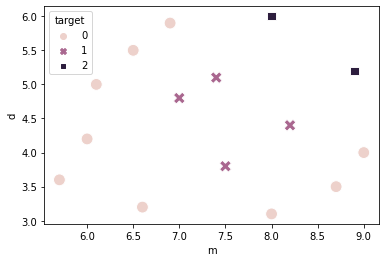

In [6]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target', s=140)

In [7]:
X = df.drop('target', axis=1)
# X = df.iloc[:-1]

y = df.target

In [8]:
X

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [9]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    2
11    2
12    0
13    0
14    0
Name: target, dtype: int64

### Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X)
y_train = y

In [12]:
df_sc = pd.DataFrame(X_train, columns=['d', 'm'])
df_sc['target'] = y_train
df_sc.head(8)

,d,m,target
0,-1.312916,-0.311578,0
1,-1.601117,-0.963718,0
2,-0.832581,1.101391,0
3,-0.736514,-1.398477,0
4,-0.448313,1.536151,0
5,0.608425,-1.507167,0
6,0.800559,-0.094198,1
7,-0.352246,0.340562,1


In [13]:
df_sc.sample(6, random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,2
4,-0.448313,1.536151,0


### Perform Training

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
hidden = 30
iter = 2500

In [16]:
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1, verbose=True)

In [17]:
model.fit(X_train, y_train)

Iteration 1, loss = 1.21423508
Iteration 2, loss = 1.20506919
Iteration 3, loss = 1.19599138
Iteration 4, loss = 1.18701883
Iteration 5, loss = 1.17815568
Iteration 6, loss = 1.16939561
Iteration 7, loss = 1.16073936
Iteration 8, loss = 1.15218683
Iteration 9, loss = 1.14373752
Iteration 10, loss = 1.13536425
Iteration 11, loss = 1.12707904
Iteration 12, loss = 1.11891606
Iteration 13, loss = 1.11085821
Iteration 14, loss = 1.10290578
Iteration 15, loss = 1.09505759
Iteration 16, loss = 1.08728092
Iteration 17, loss = 1.07960950
Iteration 18, loss = 1.07204310
Iteration 19, loss = 1.06458139
Iteration 20, loss = 1.05722119
Iteration 21, loss = 1.04995178
Iteration 22, loss = 1.04276888
Iteration 23, loss = 1.03564812
Iteration 24, loss = 1.02856832
Iteration 25, loss = 1.02155780
Iteration 26, loss = 1.01465152
Iteration 27, loss = 1.00784148
Iteration 28, loss = 1.00112553
Iteration 29, loss = 0.99450220
Iteration 30, loss = 0.98798092
Iteration 31, loss = 0.98160104
Iteration 32, los

MLPClassifier(hidden_layer_sizes=30, max_iter=2500, random_state=1,
              verbose=True)

In [18]:
print('score:', model.score(X_train, y_train))
print('predicted:', model.predict(X_train))
print('target:', np.array(y_train))

score: 1.0
predicted: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
target: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


### Plot Loss curve

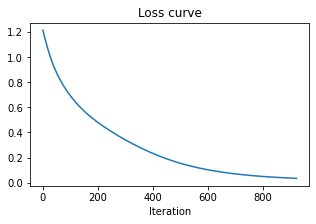

In [19]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)

### See structure

In [20]:
[coef.shape for coef in model.coefs_]

[(2, 30), (30, 3)]

## Plot Decision Region

In [21]:
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'd (diameter)')

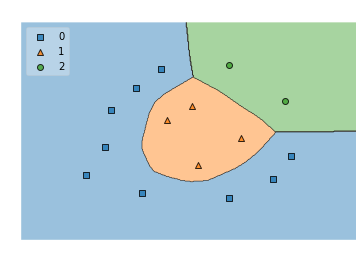

In [22]:
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)
plt.title('MLP: 3 Classes (hidden {}, iter {})'.format(hidden, iter), c='w')
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)', c='w')
plt.ylabel('d (diameter)', c='w')


## Making Prediction

In [23]:
# X_new = [8.4, 5]  in case, if we want to predict only 1 sample
X_new = [[8.4, 5],
		 [6.8, 4.2]]

In [24]:
X_new

[[8.4, 5], [6.8, 4.2]]

### Standardization

In [25]:
X_new_sc = sc.transform(X_new)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
X_new_sc

array([[ 0.99269274,  0.55794172],
       [-0.54437989, -0.31157784]])

In [27]:
type(X_new_sc)

numpy.ndarray

In [28]:
type(X_new)

list

In [29]:
X_new_sc.shape

(2, 2)

In [30]:
model.predict(X_new_sc)

array([2, 1], dtype=int64)

In [31]:
type(X_train)

numpy.ndarray

### Plot Decision Region

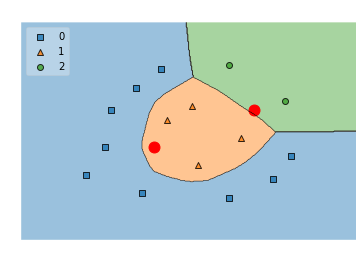

In [32]:
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)
plt.title('MLP: Prediction)', c='w')
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)', c='w')
plt.ylabel('d (diameter)', c='w')

# plot predicting scatter
plt.scatter(X_new_sc[:, 0], X_new_sc[:, 1], marker='o', s=120, c='r' )